# Social Network Analysis - Indonesia Masters

### Import Library

In [9]:
import pandas as pd 
import networkx as nx # untuk melakukan visualisasi social network analysis
import matplotlib.pyplot as plt 
%matplotlib inline

### Read Data

In [10]:
# membaca data
badminton_data = pd.read_csv("SNA_IndonesiaMasters2023_edge.csv")

In [11]:
#Sanity check
badminton_data

,Source Label,Source,Tweet Id,Created at,Text,Post Url,Target Label,Target,Target Tweet,Tweet Type
0,avocadomatch4,avocadomatch4,1617930341909671936,2023-01-25 00:00:27,RT @SPOTV_Indonesia: #BWF | 💬Komentar 🇮🇩Fajar/...,https://twitter.com/avocadomatch4/status/16179...,SPOTV_Indonesia,SPOTV_Indonesia,https://twitter.com/SPOTV_Indonesia/status/161...,Retweet
1,zahrayatunique,zahrayatunique,1617930841275109376,2023-01-25 00:02:26,RT @ainurohman: Bermain biasa dan santai2 saja...,https://twitter.com/zahrayatunique/status/1617...,ainurohman,ainurohman,https://twitter.com/ainurohman/status/16178541...,Retweet
2,youtipul,youtipul,1617930887051751425,2023-01-25 00:02:37,"RT @BadmintonLive1: Fiuhhhh!! Akhirnya , hrus ...",https://twitter.com/youtipul/status/1617930887...,BadmintonLive1,BadmintonLive1,https://twitter.com/BadmintonLive1/status/1617...,Retweet
3,nisttatinum,nisttatinum,1617931447733735425,2023-01-25 00:04:51,RT @ainurohman: Bermain biasa dan santai2 saja...,https://twitter.com/nisttatinum/status/1617931...,ainurohman,ainurohman,https://twitter.com/ainurohman/status/16178541...,Retweet
4,kembarannyaimas,kembarannyaimas,1617931560157843456,2023-01-25 00:05:18,RT @SPOTV_Indonesia: #BWF | 💬Komentar 🇮🇩The Da...,https://twitter.com/kembarannyaimas/status/161...,SPOTV_Indonesia,SPOTV_Indonesia,https://twitter.com/SPOTV_Indonesia/status/161...,Retweet
...,...,...,...,...,...,...,...,...,...,...
3098,sipandree,sipandree,1618291774459637761,2023-01-25 23:56:40,RT @BadmintonTalk: XD R32\nPraveen Jordan/Mela...,https://twitter.com/sipandree/status/161829177...,BadmintonTalk,BadmintonTalk,https://twitter.com/BadmintonTalk/status/16182...,Retweet
3099,chocolateeecup,chocolateeecup,1618291922984108033,2023-01-25 23:57:15,"RT @BadmintonLive1: Itu yang msh di Istora, me...",https://twitter.com/chocolateeecup/status/1618...,BadmintonLive1,BadmintonLive1,https://twitter.com/BadmintonLive1/status/1618...,Retweet
3100,mrjik4,mrjik4,1618292306737758208,2023-01-25 23:58:47,RT @BA_Malaysia: RESULTS: #IndonesiaMasters202...,https://twitter.com/mrjik4/status/161829230673...,BA_Malaysia,BA_Malaysia,https://twitter.com/BA_Malaysia/status/1618290...,Retweet
3101,ReqkaJ,ReqkaJ,1618292314769854466,2023-01-25 23:58:48,RT @BA_Malaysia: RESULTS: #IndonesiaMasters202...,https://twitter.com/ReqkaJ/status/161829231476...,BA_Malaysia,BA_Malaysia,https://twitter.com/BA_Malaysia/status/1618290...,Retweet


### Data Pre-Processing

In [13]:
# Mengambil kolom source dan target label saja
badminton_edges = badminton_data[["Source","Target Label"]]
# Menghapus Data bernilai NA 
badminton_edges.dropna()
#Sanity Check
badminton_edges

,Source,Target Label
0,avocadomatch4,SPOTV_Indonesia
1,zahrayatunique,ainurohman
2,youtipul,BadmintonLive1
3,nisttatinum,ainurohman
4,kembarannyaimas,SPOTV_Indonesia
...,...,...
3098,sipandree,BadmintonTalk
3099,chocolateeecup,BadmintonLive1
3100,mrjik4,BA_Malaysia
3101,ReqkaJ,BA_Malaysia


In [14]:
#Konversi DataFrame
graph_badminton = nx.from_pandas_edgelist(badminton_edges,source="Source",target="Target Label")
print(nx.info(graph_badminton))

Graph with 1528 nodes and 1891 edges


### Visualisasi Graph

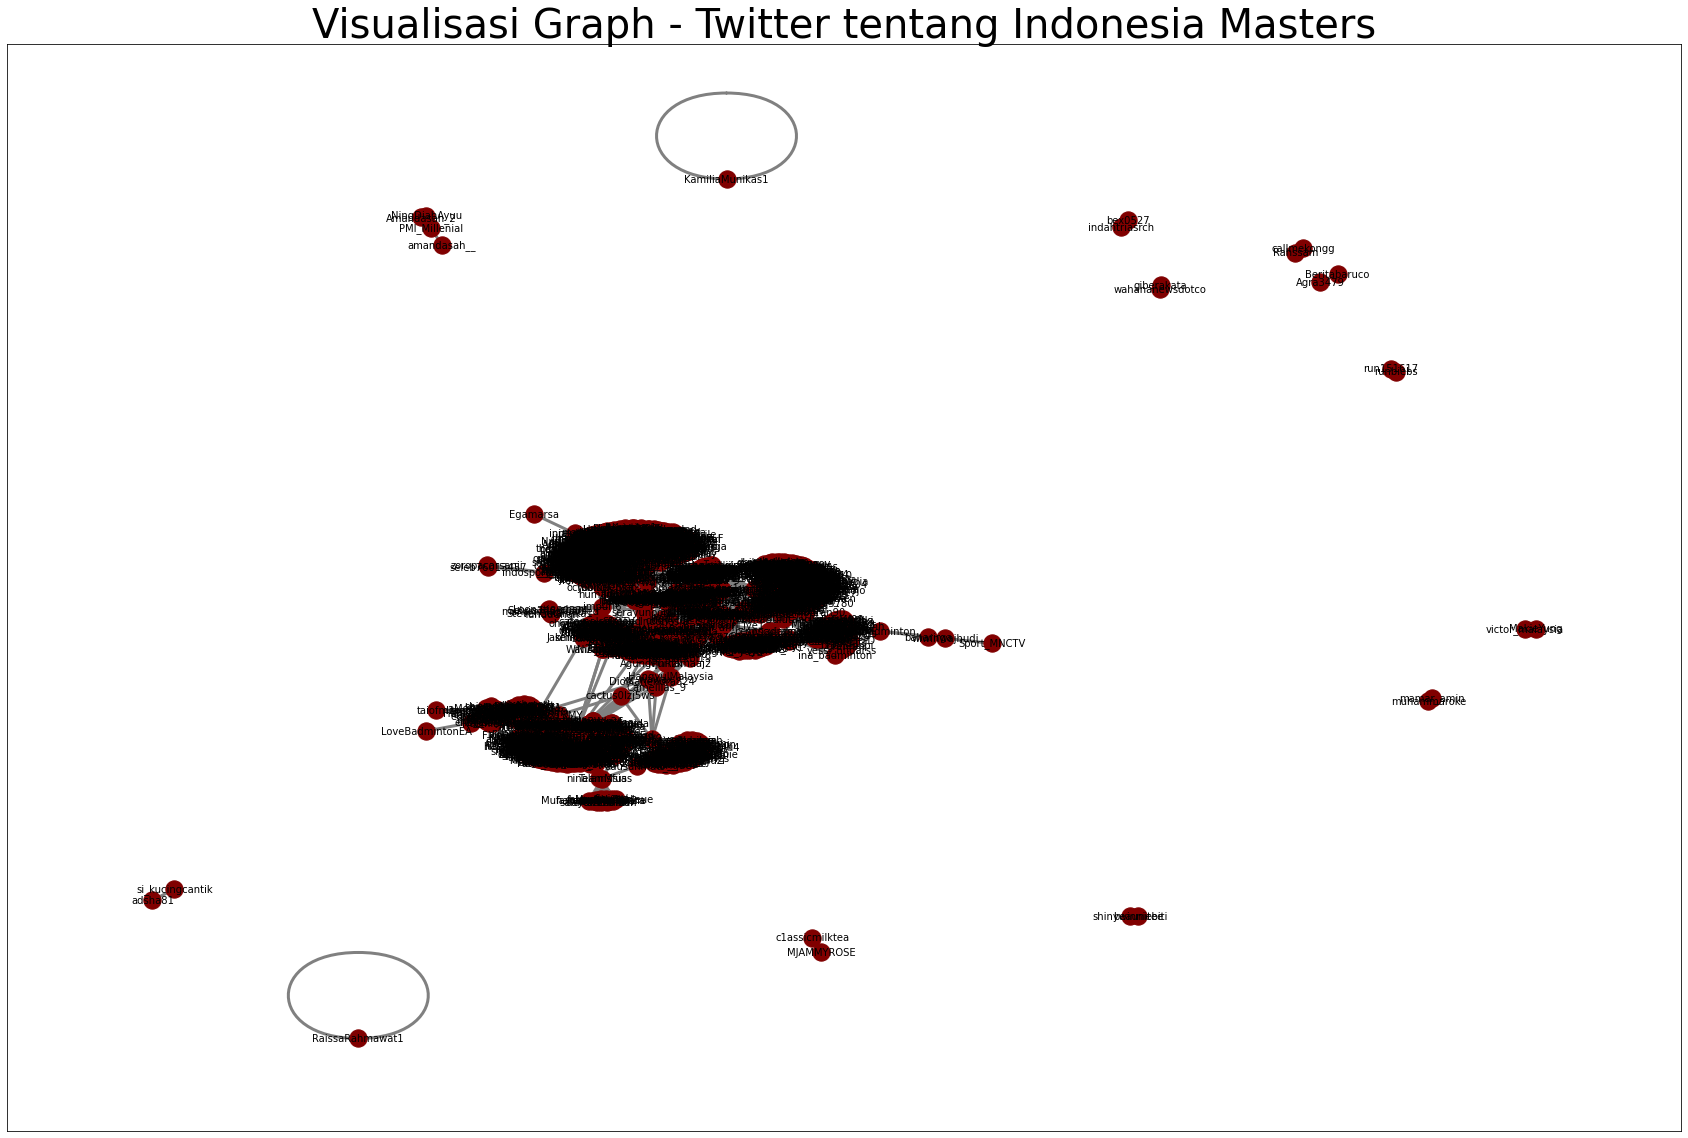

In [17]:
#Inisialisasi Graph
nx.draw
#Membentuk visualisasi
plt.figure(figsize=(30,20))
plt.title('Visualisasi Graph - Twitter tentang Indonesia Masters', fontsize = 40)
nx.draw_networkx(graph_badminton,
                 font_size=10,
                 width=3,
                 edge_color='grey',
                 node_color='maroon',
                 with_labels = True)

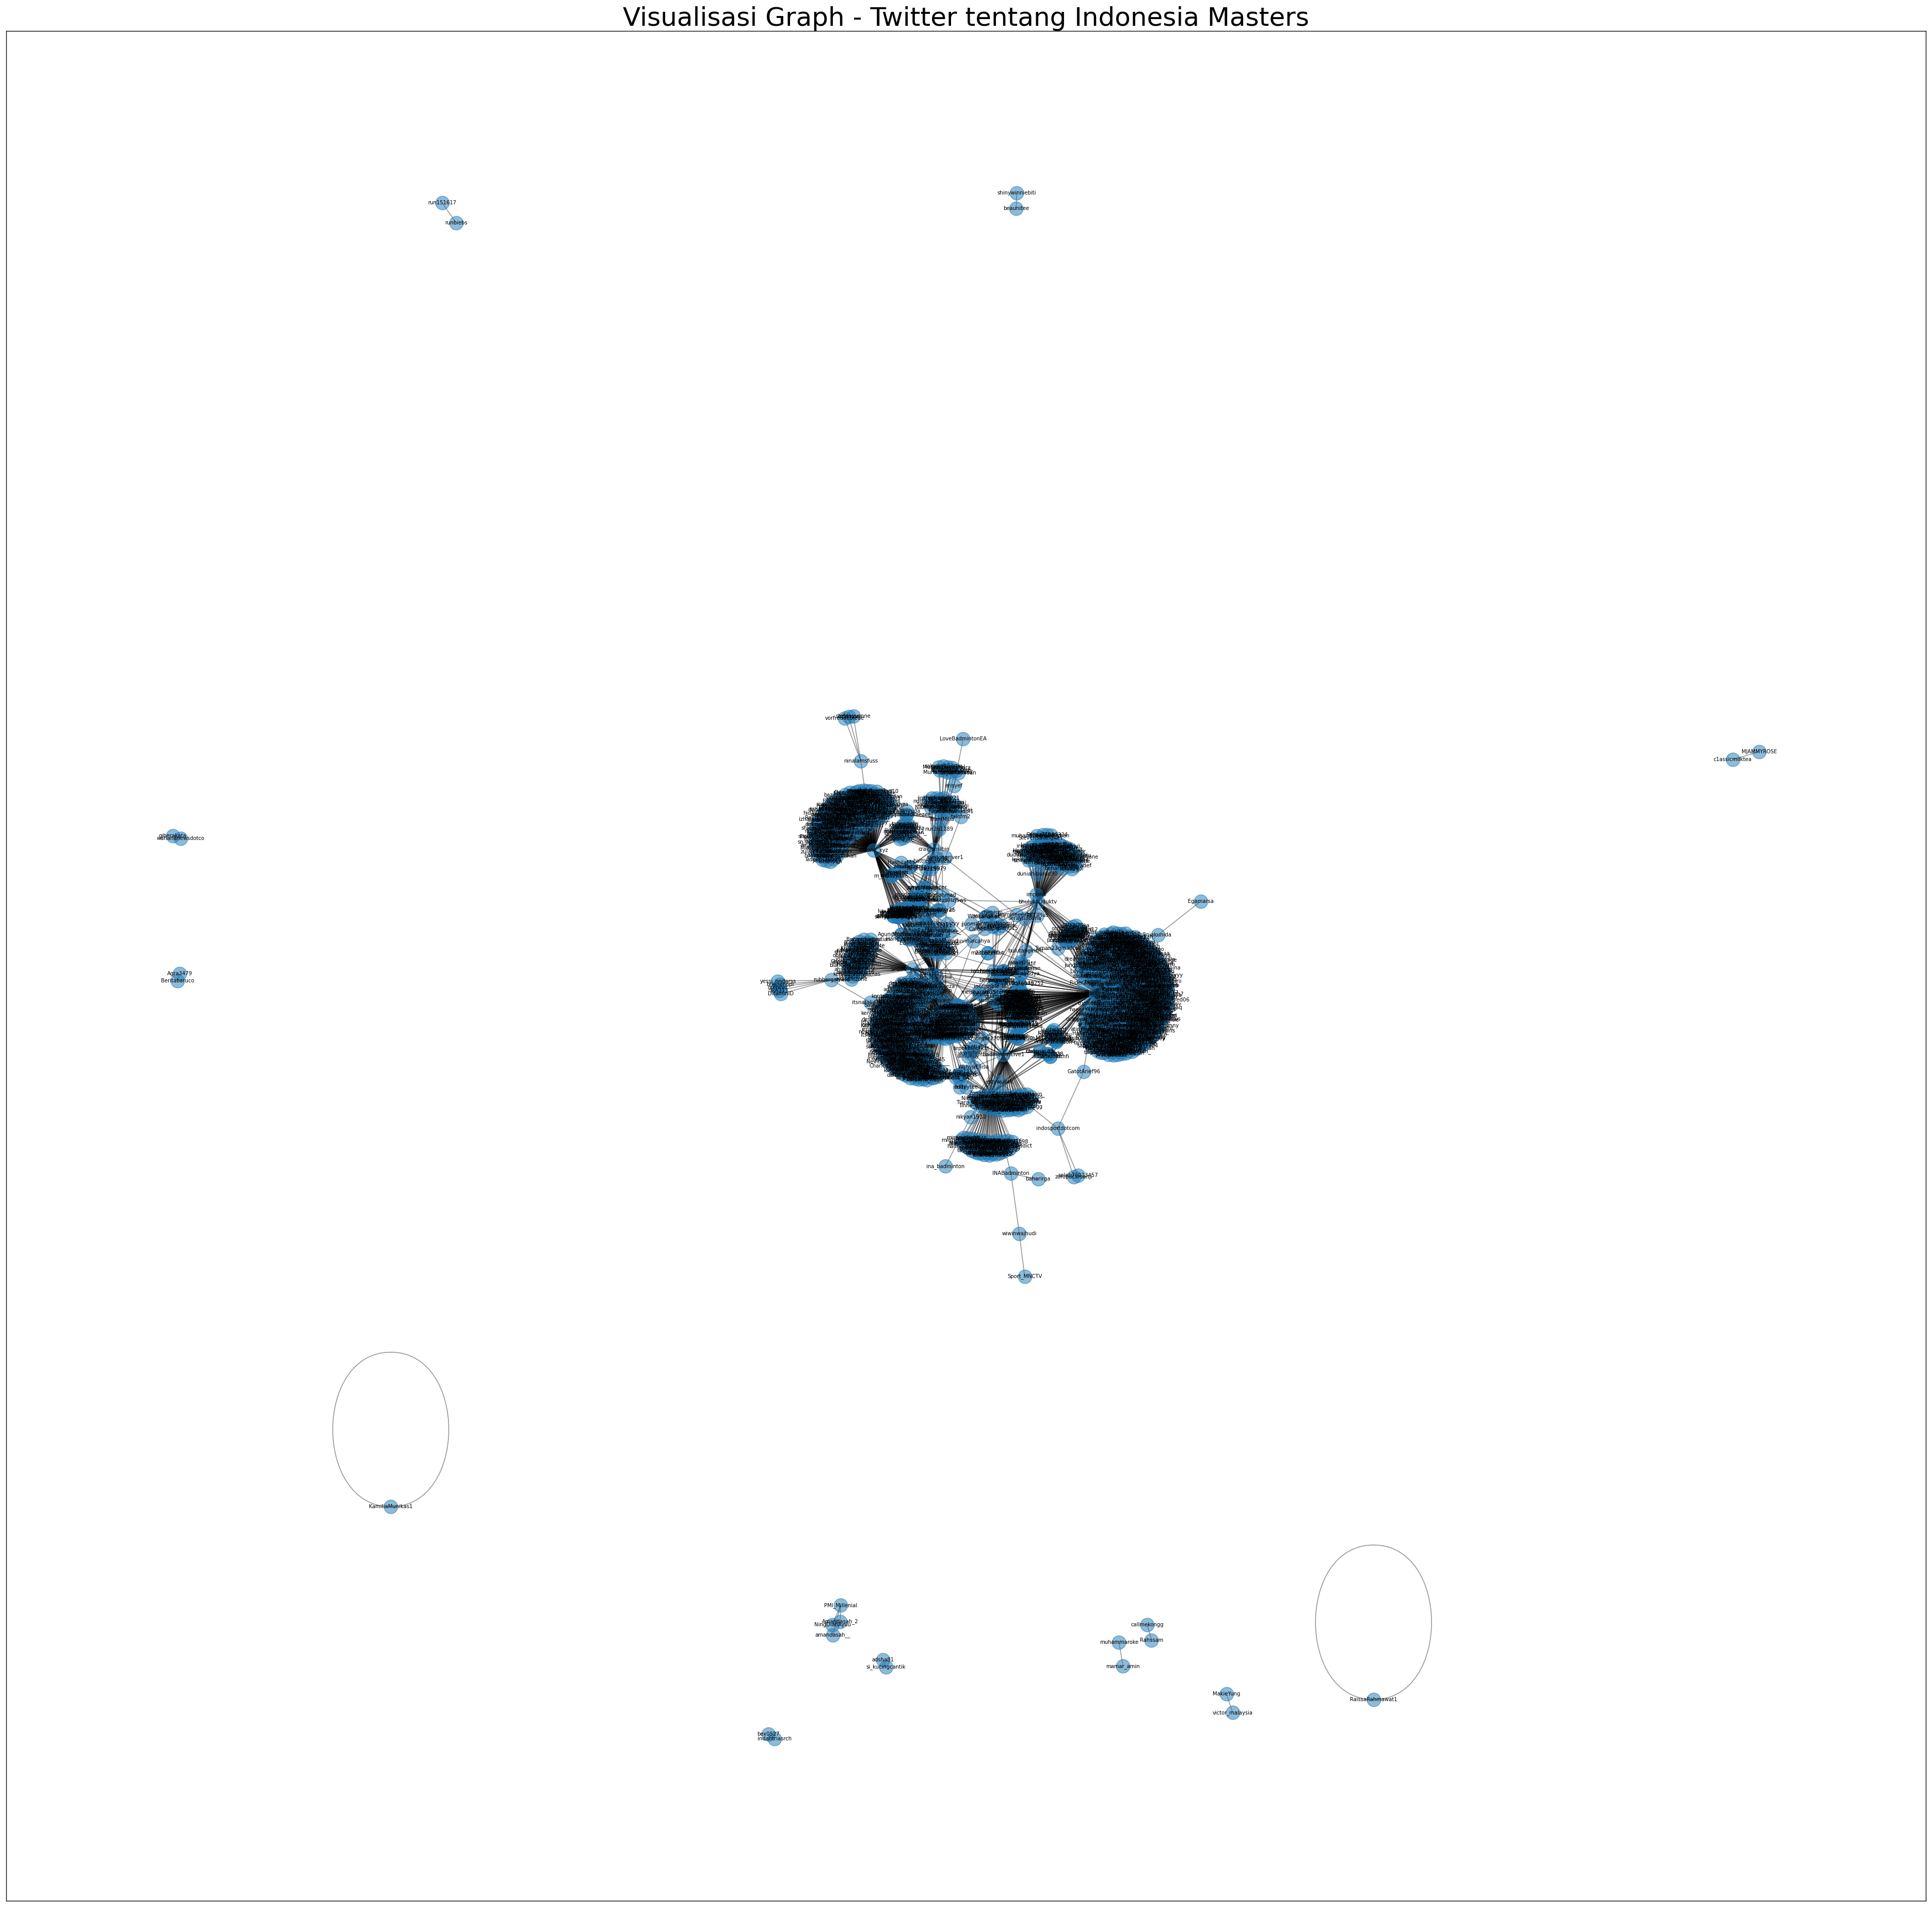

In [41]:
#Melakukan Graph Visualisasi
pos = nx.spring_layout(graph_badminton)
f, ax = plt.subplots(dpi=120, figsize=(40, 40))
nodes = nx.draw_networkx_nodes(graph_badminton, pos, alpha=0.5, node_size=250)
plt.title('Visualisasi Graph - Twitter tentang Indonesia Masters',fontsize=40)
nx.draw_networkx_labels(graph_badminton, pos, font_size=6)
nx.draw_networkx_edges(graph_badminton, pos, width=1.0, alpha=0.4)
plt.show()

### Graph Statistic (Basic)

#### Degree Centrality

In [29]:
#Mencari jumlah degree pada setiap username twitter
degree = []
tap = nx.degree(graph_badminton)
for i in tap:
    degree.append([i[0],i[1]])

#Konversi dataframe
degree_data = pd.DataFrame(degree)
degree_data.sort_values(1, axis=0, ascending = False, inplace = True)
degree_data = degree_data.rename(columns={0: "Twitter Username", 1: "Jumlah Degree"}).reset_index(drop = True)
degree_data.head(10)

,Twitter Username,Jumlah Degree
0,BadmintonTalk,584
1,ainurohman,362
2,theone_xyz,251
3,BA_Malaysia,131
4,bhulukhuduktv,106
5,BadmintonLive1,99
6,ZonaBulutangkis,84
7,SPOTV_Indonesia,76
8,craigansibin,58
9,SPOTVMY,56


#### Average Degree

In [30]:
#Menghitung Average Degree
average_degree = sum(degree_data["Jumlah Degree"]) / len(degree_data["Jumlah Degree"])
print("Average degree:", average_degree)

Average degree: 2.475130890052356


#### Closeness Centrality

In [25]:
#Menghitung Closeness Centrality
closeness = []
best_connector = nx.closeness_centrality(graph_badminton)
for w in sorted(best_connector, key=best_connector.get, reverse=True):
    closeness.append([w,best_connector[w]])

#Konversi dataframe
closeness_central = pd.DataFrame(closeness)
closeness_central = closeness_central.rename(columns={0:"Screen name",1:"Closenes centrality"})
closeness_central.head(10)

,Screen name,Closenes centrality
0,BadmintonTalk,0.416086
1,geniusuzi,0.390019
2,luvinurcahya,0.388581
3,ainurohman,0.386039
4,bighitenthu_,0.374383
5,jarkwwsh,0.371648
6,bingsu002,0.371648
7,anggytaiiu,0.368216
8,Syamsud76579252,0.367483
9,ivelkyujung,0.367483


#### Betweeness Centrality

In [91]:
#Betweenes Centrality
bet_centrality = nx.betweenness_centrality(graph_badminton, 
                                           normalized = True, 
                                           endpoints = False) #calculate using betweness centrality

In [92]:
#Konversi nx to pd series
bet_centrality = pd.Series(bet_centrality).sort_values(ascending=False)

In [93]:
#Konversi series to DataFrame
bet_centrality = bet_centrality.to_frame()
#Melakukan reset_index
bet_centrality = bet_centrality.reset_index()
#Mengganti kolom index dan 0 menjadi Twitter Username dan Betweeness Centrality
bet_centrality.rename(columns = {'index':'Twitter Username', 0:'Betweeness Centrality'}, inplace = True)
#Sanity Check
bet_centrality

,Twitter Username,Betweeness Centrality
0,BadmintonTalk,0.537092
1,ainurohman,0.356577
2,theone_xyz,0.304239
3,bhulukhuduktv,0.113650
4,BA_Malaysia,0.110238
...,...,...
1523,rndrti,0.000000
1524,LuckyLikeThat12,0.000000
1525,harobinr,0.000000
1526,nysathea,0.000000
